## 회귀분석 예제 : Boston Housing Price dataset을 이용한 집값 예측

> ### 데이터 적재 
### Boston Housing Price dataset


* 독립변수
 - CRIM: 범죄율
 - INDUS: 비소매상업지역 면적 비율
 - NOX: 일산화질소 농도
 - RM: 주택당 방 수
 - LSTAT: 인구 중 하위 계층 비율
 - B: 인구 중 흑인 비율
 - PTRATIO: 학생/교사 비율
 - ZN: 25,000 평방피트를 초과 거주지역 비율
 - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 - AGE: 1940년 이전에 건축된 주택의 비율
 - RAD: 방사형 고속도로까지의 거리
 - DIS: 직업센터의 거리
 - TAX: 재산세율

* 종속변수
 - 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

 * 1970 년대 중반 보스턴 근교 506개 타운의 범죄율, 지역, 재산세율 등과 같은 13개 독립변수로부터 해당타운의 주택 평균 가격을 예측하는 문제  

* 상대적으로 데이터 수가 작은 경우에 해당  
  (404개 학습 데이터, 102개 테스트 데이터)
* 13개의 각 독립변수들은 비율, 절대값 등 스케일이 다름  
  (0 ~ 1의 비율, 또는 1 ~ 12의 절대값)  
* 종속변수(y값)는 해당지역 집 값의 중앙값


> #### keras에 내장된 dataset 적재

In [1]:
# https://keras.io/api/datasets/boston_housing/
from tensorflow.keras.datasets import boston_housing
# keras에 내장된 dataset 적재
 
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
?boston_housing.load_data

In [3]:
# 학습 데이터 402 개
print(x_train.shape, y_train.shape)
# 시험 데이터 102 개
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [4]:
# x 변수
x_train[0] 

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
# y 변수
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

> #### scikit-learn에 내장된 dataset 적재


In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston
# scikit-learn에 내장된 dataset 적재
boston = load_boston()

In [7]:
type(boston)

sklearn.utils.Bunch

load_boston(Bunch) 으로 적재된 데이터 집합은 아래의 속성을 가진다.

* data: 독립변수 ndarray 배열
* target: 종속변수 ndarray 배열
* feature_names: 독립변수 이름 리스트
* target_names: (옵션) 종속변수 이름 리스트
* DESCR: (옵션) 자료에 대한 설명 문자열

In [8]:
# boston 데이터셋의 사용가능한 메소드와 변수 확인
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [9]:
# 자료에 대한 설명
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
# 독립변수 이름 리스트
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
# 독립변수 ndarray 배열
print(boston.data)
print(boston.data.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


In [12]:
# 종속변수 ndarray 배열
print(boston.target)
print(boston.target.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [13]:
import pandas as pd
# dfX 데이터 프레임을 생성하여 x변수 데이터와 변수명 대입
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
# dfY 데이터 프레임을 생성하여 y변수 데이터와 변수명 대입
dfY = pd.DataFrame(boston.target, columns=["MEDV"])
# 데이터 프레임합치기(axis=0,  # 0: 위+아래로 합치기, 1: 왼쪽+오른쪽으로 합치기)
df = pd.concat([dfX, dfY], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# 5-Number summary 요약 수치(통계량)
print(df.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


데이터프레임을 만든 후에는 주로 다음과 같은 데이터에 대한 탐색적 분석을 수행한다. 

- 데이터에 누락된 값이 있는지 확인
- 각 데이터가 연속적인 실수값인지 범주형 값인지 확인
- 실수형 데이터의 분포가 정규 분포인지 확인
- 실수형 데이터에 양수 혹은 범위 등으로 제한 조건이 있는지 확인
- 범주형 데이터의 경우 범주의 값이 어떤 값 혹은 숫자로 표현되어 있는지 확인
- 데이터간의 상관관계를 확인
- 데이터에 이상한 값(outlier)들이 있는지 확인  

보스턴 데이터의 경우 0과 1로 표현된 CHAS 데이터를 제외하고는 가격을 포함한 대부분의 데이터가 양수인 실수이다. 

* 데이터의 분포와 데이터들간의 상관관계 분석

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


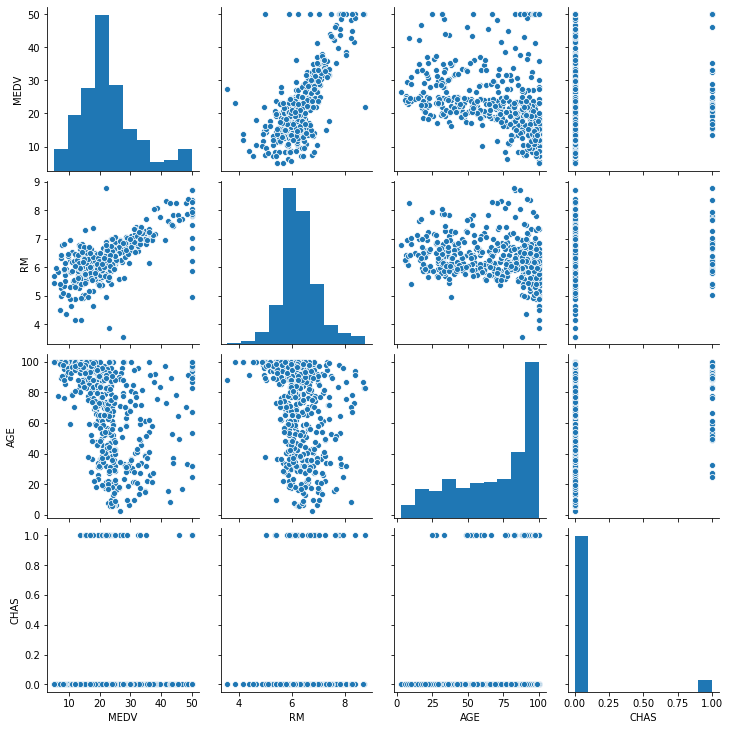

In [15]:
# seaborn의 pairplot 으로 각 데이터의 분포와 데이터들간의 상관관계를 파악 
# 가격(MEDV)과 주택당 방수(RM) 간 강한 양의 상관관계를 가지는 것을 확인 
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

* 주택당 방수(RM) 이 증가하면 가격(MEDV)이 증가하는 양의 상관관계가 있으며 피어슨 상관계수 값이 0.69로 강한 상관관계를보인다. 
* 일반적으로 종속변수와 상관관계가 있는 변수를 독립변수로 정한다.
  상관관계가 없는 독립변수는 종속변수에 영향을 미친다고 보기 어렵다.

In [16]:
from scipy.stats.stats import pearsonr
# 상관계수와 p-value 확인
pearsonr(df.MEDV, df.RM) 

(0.6953599470715394, 2.4872288710071593e-74)

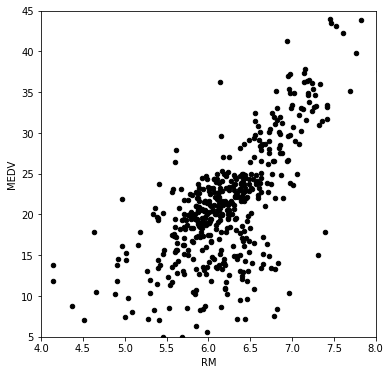

In [17]:
# 산점도 표현
# plot함수를 통해 x축에는 "RM" 독립변수 y축에는 "MEDV" 종속변수를 plot 
# xlim, ylim파라미터를 통해 x축과 y축에 범위를 사용자 임의로 설정 가능
df.plot(kind="scatter", x="RM", y="MEDV", figsize=(6,6), color="black", xlim = (4,8), ylim = (5,45))

> ### 학습 데이터와 시험 데이터 준비
### scikit-learn 패키지의 model_selection 서브 패키지는 KFold 클래스(k-fold cross validation)를 비롯한 다양한 모형 검증 기능을 제공

> train_test_split : 데이터를 학습용 데이터와 시험용 데이터로 분리  
train_test_split(data, data2, test_size, train_size, random_state)    
  

* data: 독립 변수 데이터 배열 또는 데이터프레임
* data2: 종속 변수 데이터(data 인수에 종속 변수 데이터가 같이 있으면 생략 가능)
* test_size: 검증용 데이터 개수(1보다 작은 실수이면 비율)
* train_size: 학습용 데이터의 개수(1보다 작은 실수이면 비율, test_size와 train_size 중 하나만 있어도 된다.)
* random_state: 난수 시드

In [18]:
from sklearn import model_selection

# 학습 데이터와 시험 데이터를 80:20의 비율로 분할
# scikit-learn에 내장된 dataset 적재의 경우만 분할
# keras에 내장된 dataset 적재의 경우는 이미 학습/시험데이터를 분할 적재하였기 때문에 이부분은 생략하고 진행
x_train, x_test, y_train, y_test = model_selection.train_test_split(dfX, dfY, test_size=0.2)

In [19]:
# 학습 데이터 404 개
print(x_train.shape, y_train.shape)
# 시험 데이터 102 개
print(x_test.shape, y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


> ### 선형회귀 모델 학습  
### scikit-learn의 inear_model.LinearRegression 함수를 통해 선형회귀모델을 생성하고 학습

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 생성
modelLR = LinearRegression()
# 선형회귀 모델 학습, 선형회귀는 하이퍼 파라미터가 존재하지 않음(b0 존재여부)
modelLR.fit(x_train, y_train)

# 학습된 회귀모형의 가중치(계수) 확인
# modelLR.intercept_ : b0(y절편), modelLR.coef_ : b1 ~ bn(각 독립변수의 가중치/기울기)
print(modelLR.intercept_, modelLR.coef_)

# ** 주의: 학습데이터로 이용된 데이터가 달라지면 회귀 계수도 달라질 수 있음

[40.49886267] [[-1.23780386e-01  5.40364418e-02 -2.13602870e-02  2.80241075e+00
  -1.60513966e+01  2.69367454e+00 -1.84306613e-04 -1.49108813e+00
   3.38445324e-01 -1.30558658e-02 -8.35852677e-01  1.00607456e-02
  -5.35377012e-01]]


학습된 회귀 방정식은 다음과 같다.  


> y = 34.77685585 − 0.107402855 x CRIM + 0.0338714044 x ZN + ... - 0.554815856 x LSTAT

> ### 모델 성능 평가
### scikit-learn의 metrics 서브패키지에는 예측 성능을 평가하기 위한 다양한 함수를 제공

> ### 회귀분석과 관련된 함수
* r2_score: 결정 계수(모형의 적합도)
* mean_absolute_error : 평균 절대 오차(mean absolute error)
* mean_squared_error: 평균 제곱 오차(mean squared error)
* median_absolute_error: 절대 오차 중앙값(median absolute error)
  
  
> ### 회귀모형의 성능지표
* y : 실제값
* ŷ : 회귀모델의 예측값
* error =  y (실제값) - ŷ (회귀모델의 예측값)

![MAE ](https://drive.google.com/uc?export=download&id=1OVNsya4sClIJ74G_-xTcTj8bK1jHA9bc)     
 
평균 절대 오차(mean absolute error)  
![MAE ](https://drive.google.com/uc?export=download&id=13S7KgWJkTBbPvhNIFDFUrRiiz76cLOI5)     

평균 제곱 오차(mean squared error)  
![MSE ](https://drive.google.com/uc?export=download&id=1RTPi1TawblFpjeM3cxFfpiKqqSR5yGQU)   
  
평균 제곱근 오차(Root mean squared error)  
![RMSE ](https://drive.google.com/uc?export=download&id=1r01LHHCDvGPIJtuQ6X_DgMRYDn1B8-BM)   
 
  

In [21]:
from sklearn import metrics

# 시험용 x 변수를 모형에 입력하여 y값 예측
y_predict = modelLR.predict(x_test) 
# 시험용 y변수와 모형으로 예측된 y값을 비교하여 R2 계산
rsquared = metrics.r2_score(y_test, y_predict)
print('Test R2: ', rsquared)

# 시험용 y변수와 모형으로 예측된 y값을 비교하여 MAE 계산
mae = metrics.mean_absolute_error(y_test, y_predict)
print('Test MAE: ', mae)

# 시험용 y변수와 모형으로 예측된 y값을 비교하여 MSE 계산
mse = metrics.mean_squared_error(y_test, y_predict)
print('Test MSE: ', mse)

# MSE의 제곱근을 RMSE로 계산
rmse = mse**0.5
print('Test RMSE: ', rmse)

import math
rmse = math.sqrt(mse)
print('Test RMSE: ', rmse)

Test R2:  0.8051874112111452
Test MAE:  3.515002061332583
Test MSE:  23.20042368958105
Test RMSE:  4.8166818131968245
Test RMSE:  4.8166818131968245


#  

In [22]:
# error(잔차) 계산: 실제 y값("MEDV")에서 예측 값 y를 빼서 계산  
residuals = y_test - y_predict
print(y_test.shape)
print(y_predict.shape)
print(residuals)


(102, 1)
(102, 1)
          MEDV
184   3.106913
112  -1.898510
203   8.038227
53   -0.670587
213   3.360440
..         ...
489  -0.955145
179   5.108937
422   1.818678
98   10.593758
230  -0.258757

[102 rows x 1 columns]


### 회귀모델의 적합도 R-squared

SST (Total sum of squares) = SSE + SSR   
 ![SST ](https://drive.google.com/uc?export=download&id=1Ds0vmkplVpqtUs0zJfCG4vQZd11phuQs)   
 
* y : 실제값
* y ̅ : 실제값들의 평균
* ŷ : 회귀모델의 예측값

- SST (Total sum of squares) : 총 변동, 실제값과 실제값 평균의 차이
- SSR (The sum of squared residuals) : 회귀모델로 설명된 변동, 회귀모델로 예측한 값과 실제값들의 평균의 차이에 대한 제곱합
- SSE (The sum of squared errors of prediction) : 회귀모델로 설명이 안된 변동, 실제값과 회귀모델로 예측한 값 차이의 제곱합
- 결정계수 (R-squared) : 총 변동에서 회귀모델로 설명된 변동의 비율, SSR/SST 또는 1 - (SSE/SST)

In [23]:
# 적합도 검증을 위한 결정계수 R2 계산

# SST = Y와 Y의 평균의 차이를 제곱합
# "MEDV"에 저장된 실제 y값에서 numpy.mean 함수를 이용해 "MEDV"를 평균한 값을 빼고 제곱한 값을 numpy.sum함수를 이용해 더하여 산출
SST = ((y_test - y_test.mean()) ** 2).sum()

# SSE = Y와 예측된 Y의 차이를 제곱합
# residual(Y와 예측된 Y의 차이)에 저장된 잔차 값을 제곱한 값을 numpy.sum함수를 이용해 더하여 산출
SSE = (residuals**2).sum()

# R_squared = 1 - (SSE/SST), 결정계수를 구하는 식과 같이 SSE에서 SST를 나누고 1에서 빼서 산출 
R_squared = 1 - (SSE/SST)

# 출력된 결정계수 74.51%로 결과를 통해 x값이 y값을 설명하고 있는 것을 확인
print('SST = ', SST)
print('SSE = ', SSE)
print('R_squared = ', R_squared)


SST =  MEDV    12147.280784
dtype: float64
SSE =  MEDV    2366.443216
dtype: float64
R_squared =  MEDV    0.805187
dtype: float64


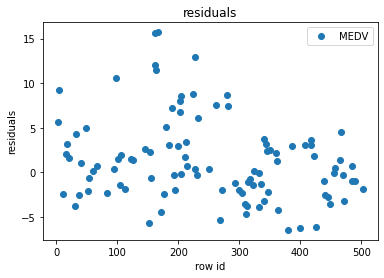

In [24]:
# 데이터 ID(x축)별 잔차(y축)을 scatter plot
residuals.plot(style="o")
plt.title("residuals")
plt.xlabel("row id") 
plt.ylabel("residuals")
plt.show()

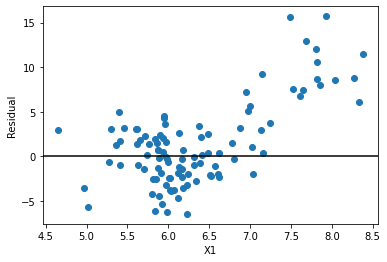

In [25]:
# RM(x축)별 잔차(y축)을 scatter plot
plt.plot(x_test["RM"], residuals, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()